In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
# from res.plot_lib import set_default, plot_state, print_colourbar

In [ ]:
import tensorflow as tf
tf.random.set_seed(2479)

### Data Preprocessing, for kaggle dataset i filter data only from 2021 to 2022, and combine with data from 4th january to 28th february

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/stock market dataset/AMZN.csv')
df

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,15-05-1997,0.096354,0.121875,1443120000,0.125000,0.097917,0.097917
1,16-05-1997,0.085417,0.098438,294000000,0.098958,0.086458,0.086458
2,19-05-1997,0.081250,0.088021,122136000,0.088542,0.085417,0.085417
3,20-05-1997,0.081771,0.086458,109344000,0.087500,0.081771,0.081771
4,21-05-1997,0.068750,0.081771,377064000,0.082292,0.071354,0.071354
...,...,...,...,...,...,...,...
6433,06-12-2022,87.900002,90.500000,75503600,91.040001,88.250000,88.250000
6434,07-12-2022,87.480003,88.339996,68086900,89.889999,88.459999,88.459999
6435,08-12-2022,87.879997,89.239998,73305900,90.860001,90.349998,90.349998
6436,09-12-2022,88.629997,88.900002,67316900,90.300003,89.089996,89.089996


In [ ]:
seconddf = pd.read_csv('/content/AMZN_23dec.csv')
seconddf

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-12-23,83.250000,85.779999,82.930000,85.250000,85.250000,57433700
1,2022-12-27,84.970001,85.349998,83.000000,83.040001,83.040001,57284000
2,2022-12-28,82.800003,83.480003,81.690002,81.820000,81.820000,58228600
3,2022-12-29,82.870003,84.550003,82.550003,84.180000,84.180000,54995900
4,2022-12-30,83.120003,84.050003,82.470001,84.000000,84.000000,62401200
5,2023-01-03,85.459999,86.959999,84.209999,85.820000,85.820000,76706000
6,2023-01-04,86.550003,86.980003,83.360001,85.139999,85.139999,68885100
7,2023-01-05,85.330002,85.419998,83.070000,83.120003,83.120003,67930800
8,2023-01-06,83.029999,86.400002,81.430000,86.080002,86.080002,83303400
9,2023-01-09,87.459999,89.480003,87.080002,87.360001,87.360001,65266100


In [ ]:
seconddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       43 non-null     object 
 1   Open       43 non-null     float64
 2   High       43 non-null     float64
 3   Low        43 non-null     float64
 4   Close      43 non-null     float64
 5   Adj Close  43 non-null     float64
 6   Volume     43 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 2.5+ KB


In [ ]:
seconddf['Date'] = pd.to_datetime(seconddf['Date'])
seconddf

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-12-23,83.250000,85.779999,82.930000,85.250000,85.250000,57433700
1,2022-12-27,84.970001,85.349998,83.000000,83.040001,83.040001,57284000
2,2022-12-28,82.800003,83.480003,81.690002,81.820000,81.820000,58228600
3,2022-12-29,82.870003,84.550003,82.550003,84.180000,84.180000,54995900
4,2022-12-30,83.120003,84.050003,82.470001,84.000000,84.000000,62401200
5,2023-01-03,85.459999,86.959999,84.209999,85.820000,85.820000,76706000
6,2023-01-04,86.550003,86.980003,83.360001,85.139999,85.139999,68885100
7,2023-01-05,85.330002,85.419998,83.070000,83.120003,83.120003,67930800
8,2023-01-06,83.029999,86.400002,81.430000,86.080002,86.080002,83303400
9,2023-01-09,87.459999,89.480003,87.080002,87.360001,87.360001,65266100


In [ ]:
seconddf.rename(columns={"Adj Close":"Adjusted Close"},inplace=True)
seconddf

,Date,Open,High,Low,Close,Adjusted Close,Volume
0,2022-12-23,83.250000,85.779999,82.930000,85.250000,85.250000,57433700
1,2022-12-27,84.970001,85.349998,83.000000,83.040001,83.040001,57284000
2,2022-12-28,82.800003,83.480003,81.690002,81.820000,81.820000,58228600
3,2022-12-29,82.870003,84.550003,82.550003,84.180000,84.180000,54995900
4,2022-12-30,83.120003,84.050003,82.470001,84.000000,84.000000,62401200
5,2023-01-03,85.459999,86.959999,84.209999,85.820000,85.820000,76706000
6,2023-01-04,86.550003,86.980003,83.360001,85.139999,85.139999,68885100
7,2023-01-05,85.330002,85.419998,83.070000,83.120003,83.120003,67930800
8,2023-01-06,83.029999,86.400002,81.430000,86.080002,86.080002,83303400
9,2023-01-09,87.459999,89.480003,87.080002,87.360001,87.360001,65266100


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
print(df.head())

        Date       Low      Open      Volume      High     Close  \
0 1997-05-15  0.096354  0.121875  1443120000  0.125000  0.097917   
1 1997-05-16  0.085417  0.098438   294000000  0.098958  0.086458   
2 1997-05-19  0.081250  0.088021   122136000  0.088542  0.085417   
3 1997-05-20  0.081771  0.086458   109344000  0.087500  0.081771   
4 1997-05-21  0.068750  0.081771   377064000  0.082292  0.071354   

   Adjusted Close  
0        0.097917  
1        0.086458  
2        0.085417  
3        0.081771  
4        0.071354  


<ipython-input-78-367313604729>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
filterdf = df[df['Date'] > '2021-01-02']
filterdf

,Date,Low,Open,Volume,High,Close,Adjusted Close
5948,2021-04-01,157.201004,163.500000,88228000,163.600006,159.331497,159.331497
5949,2021-05-01,158.253006,158.300507,53110000,161.169006,160.925507,160.925507
5950,2021-06-01,156.557999,157.324005,87896000,159.875504,156.919006,156.919006
5951,2021-07-01,157.750000,157.850006,70290000,160.427002,158.108002,158.108002
5952,2021-08-01,157.110001,159.000000,70754000,159.531998,159.134995,159.134995
...,...,...,...,...,...,...,...
6433,2022-06-12,87.900002,90.500000,75503600,91.040001,88.250000,88.250000
6434,2022-07-12,87.480003,88.339996,68086900,89.889999,88.459999,88.459999
6435,2022-08-12,87.879997,89.239998,73305900,90.860001,90.349998,90.349998
6436,2022-09-12,88.629997,88.900002,67316900,90.300003,89.089996,89.089996


In [ ]:
joindf = filterdf.append(seconddf)
joindf

<ipython-input-80-2166c9bfd17f>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  joindf = filterdf.append(seconddf)


,Date,Low,Open,Volume,High,Close,Adjusted Close
5948,2021-04-01,157.201004,163.500000,88228000,163.600006,159.331497,159.331497
5949,2021-05-01,158.253006,158.300507,53110000,161.169006,160.925507,160.925507
5950,2021-06-01,156.557999,157.324005,87896000,159.875504,156.919006,156.919006
5951,2021-07-01,157.750000,157.850006,70290000,160.427002,158.108002,158.108002
5952,2021-08-01,157.110001,159.000000,70754000,159.531998,159.134995,159.134995
...,...,...,...,...,...,...,...
38,2023-02-21,94.269997,95.339996,56580400,95.610001,94.580002,94.580002
39,2023-02-22,94.800003,95.099998,59534100,97.010002,95.790001,95.790001
40,2023-02-23,93.669998,96.120003,48467000,96.430000,95.820000,95.820000
41,2023-02-24,92.320000,93.529999,57053800,94.139999,93.500000,93.500000


In [ ]:
joindf.reset_index(drop=True, inplace=True)
joindf

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,2021-04-01,157.201004,163.500000,88228000,163.600006,159.331497,159.331497
1,2021-05-01,158.253006,158.300507,53110000,161.169006,160.925507,160.925507
2,2021-06-01,156.557999,157.324005,87896000,159.875504,156.919006,156.919006
3,2021-07-01,157.750000,157.850006,70290000,160.427002,158.108002,158.108002
4,2021-08-01,157.110001,159.000000,70754000,159.531998,159.134995,159.134995
...,...,...,...,...,...,...,...
527,2023-02-21,94.269997,95.339996,56580400,95.610001,94.580002,94.580002
528,2023-02-22,94.800003,95.099998,59534100,97.010002,95.790001,95.790001
529,2023-02-23,93.669998,96.120003,48467000,96.430000,95.820000,95.820000
530,2023-02-24,92.320000,93.529999,57053800,94.139999,93.500000,93.500000


In [ ]:
joindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            532 non-null    datetime64[ns]
 1   Low             532 non-null    float64       
 2   Open            532 non-null    float64       
 3   Volume          532 non-null    int64         
 4   High            532 non-null    float64       
 5   Close           532 non-null    float64       
 6   Adjusted Close  532 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 29.2 KB


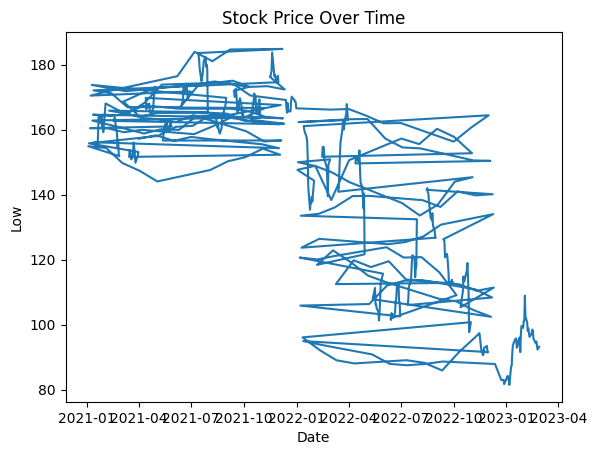

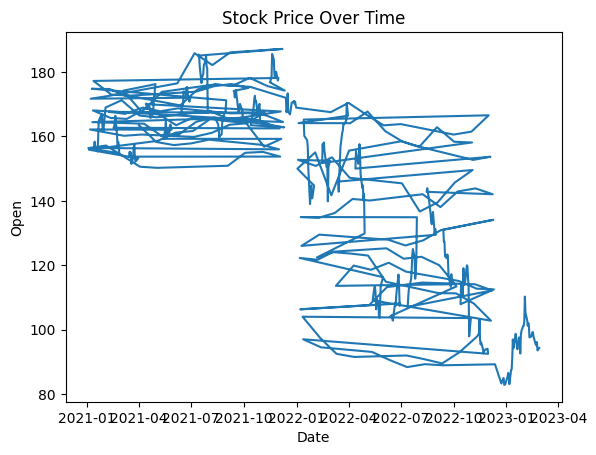

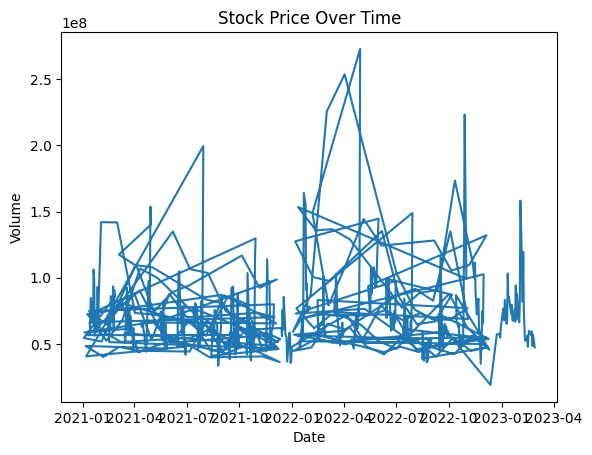

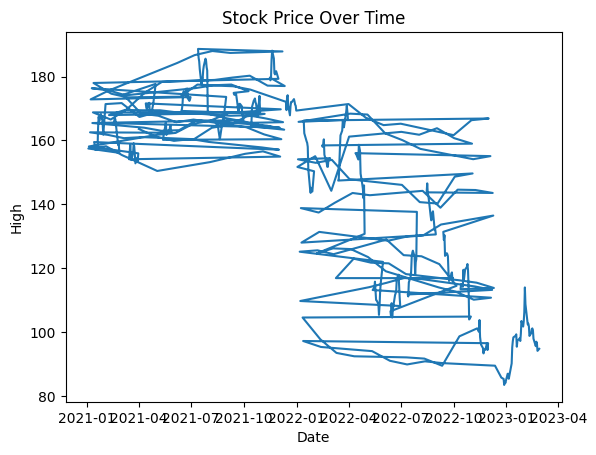

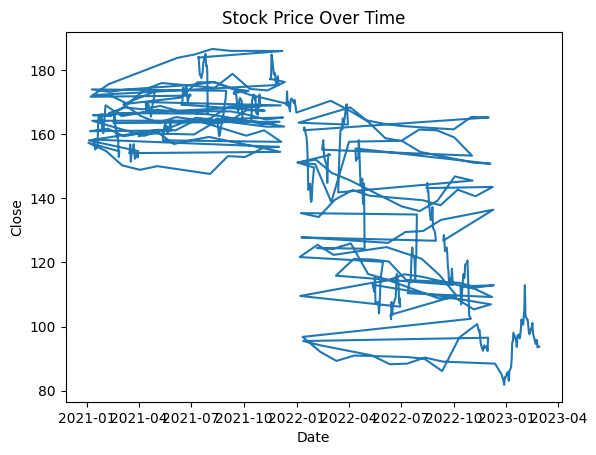

In [ ]:
for idx in range(1,len(joindf.columns.values)-1):
  plt.plot(joindf['Date'],joindf[joindf.columns[idx]])
  plt.xlabel('Date')
  plt.ylabel(joindf.columns[idx])

  plt.title('Stock Price Over Time')
  plt.show()

In [ ]:
training_set_low = joindf.iloc[:,1:2].values
training_set_open = joindf.iloc[:,2:3].values
training_set_high = joindf.iloc[:,4:5].values
training_set_close = joindf.iloc[:,5:6].values
training_set_low.shape, joindf.shape
training_set_open.shape, joindf.shape
training_set_high.shape, joindf.shape
training_set_close.shape, joindf.shape

((532, 1), (532, 7))

In [ ]:
training_set_open

array([[163.5       ],
       [158.30050659],
       [157.32400513],
       [157.8500061 ],
       [159.        ],
       [157.40049744],
       [156.        ],
       [156.42199707],
       [158.37600708],
       [156.15100098],
       [155.3500061 ],
       [159.09950256],
       [164.6499939 ],
       [165.21549988],
       [166.42500305],
       [164.81799316],
       [167.07449341],
       [161.7519989 ],
       [161.5       ],
       [169.        ],
       [171.25050354],
       [166.5       ],
       [165.94999695],
       [167.92500305],
       [165.62449646],
       [165.69999695],
       [164.6000061 ],
       [162.5       ],
       [162.70249939],
       [163.17999268],
       [164.1210022 ],
       [166.41149902],
       [160.40649414],
       [156.35150146],
       [158.3374939 ],
       [156.83700562],
       [154.75999451],
       [156.39450073],
       [157.17349243],
       [154.05900574],
       [150.6000061 ],
       [150.25      ],
       [150.75      ],
       [150

In [ ]:
training_set_low

array([[157.20100403],
       [158.25300598],
       [156.55799866],
       [157.75      ],
       [157.11000061],
       [155.5       ],
       [154.30000305],
       [156.10400391],
       [156.02949524],
       [154.75849915],
       [154.80000305],
       [158.75      ],
       [164.47850037],
       [164.15800476],
       [162.15750122],
       [164.14349365],
       [160.35400391],
       [161.43449402],
       [159.22749329],
       [168.0565033 ],
       [165.43099976],
       [163.88749695],
       [165.13549805],
       [165.19999695],
       [164.89199829],
       [162.69999695],
       [162.40299988],
       [161.66549683],
       [162.67950439],
       [162.9750061 ],
       [163.69700623],
       [162.2875061 ],
       [158.61300659],
       [154.67999268],
       [156.26899719],
       [152.38800049],
       [151.83500671],
       [154.89950562],
       [154.35600281],
       [149.75      ],
       [147.27149963],
       [144.05000305],
       [147.56550598],
       [150

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
training_set_scaled_low = scaler.fit_transform(training_set_low)
training_set_scaled_open = scaler.fit_transform(training_set_open)
training_set_scaled_high = scaler.fit_transform(training_set_high)
training_set_scaled_close = scaler.fit_transform(training_set_close)

In [ ]:
x_train_low = []
y_train_low = []

for i in range(10,532):
  x_train_low.append(training_set_scaled_low[i-10:i,0])
  y_train_low.append(training_set_scaled_low[i,0])

x_train_low, y_train_low = np.array(x_train_low),np.array(y_train_low)

In [ ]:
x_train_open = []
y_train_open = []

for i in range(10,532):
  x_train_open.append(training_set_scaled_open[i-10:i,0])
  y_train_open.append(training_set_scaled_open[i,0])

x_train_open, y_train_open = np.array(x_train_open),np.array(y_train_open)

In [ ]:
x_train_high = []
y_train_high = []

for i in range(10,532):
  x_train_high.append(training_set_scaled_high[i-10:i,0])
  y_train_high.append(training_set_scaled_high[i,0])

x_train_high, y_train_high = np.array(x_train_high),np.array(y_train_high)

In [ ]:
x_train_close = []
y_train_close = []

for i in range(10,532):
  x_train_close.append(training_set_scaled_close[i-10:i,0])
  y_train_close.append(training_set_scaled_close[i,0])

x_train_close, y_train_close = np.array(x_train_close),np.array(y_train_close)

In [ ]:
x_train_low.shape

(522, 10)

In [ ]:
x_train_low = x_train_low.reshape(522,10,1)
x_train_open = x_train_open.reshape(522,10,1)
x_train_high = x_train_high.reshape(522,10,1)
x_train_close = x_train_close.reshape(522,10,1)

### Build LSTM Model and do training using keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

modelkeraslow = Sequential([layers.Input((10, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

modelkeraslow.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

modelkeraslow.fit(x_train_low, y_train_low, epochs=100)

Epoch 1/100
17/17 [==============================] - 3s 8ms/step - loss: 0.2643 - mean_absolute_error: 0.4470
Epoch 2/100
17/17 [==============================] - 0s 7ms/step - loss: 0.0236 - mean_absolute_error: 0.1300
Epoch 3/100
17/17 [==============================] - 0s 9ms/step - loss: 0.0133 - mean_absolute_error: 0.0964
Epoch 4/100
17/17 [==============================] - 0s 7ms/step - loss: 0.0079 - mean_absolute_error: 0.0724
Epoch 5/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0053 - mean_absolute_error: 0.0571
Epoch 6/100
17/17 [==============================] - 0s 7ms/step - loss: 0.0038 - mean_absolute_error: 0.0480
Epoch 7/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0036 - mean_absolute_error: 0.0463
Epoch 8/100
17/17 [==============================] - 0s 9ms/step - loss: 0.0036 - mean_absolute_error: 0.0469
Epoch 9/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0036 - mean_absolute_error: 0.0468
Epoch 10/1

In [ ]:
modelkerasopen = Sequential([layers.Input((10, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

modelkerasopen.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

modelkerasopen.fit(x_train_open, y_train_open, epochs=100)

Epoch 1/100
17/17 [==============================] - 4s 12ms/step - loss: 0.1314 - mean_absolute_error: 0.2857
Epoch 2/100
17/17 [==============================] - 0s 11ms/step - loss: 0.0145 - mean_absolute_error: 0.1029
Epoch 3/100
17/17 [==============================] - 0s 11ms/step - loss: 0.0057 - mean_absolute_error: 0.0600
Epoch 4/100
17/17 [==============================] - 0s 13ms/step - loss: 0.0040 - mean_absolute_error: 0.0493
Epoch 5/100
17/17 [==============================] - 0s 12ms/step - loss: 0.0034 - mean_absolute_error: 0.0455
Epoch 6/100
17/17 [==============================] - 0s 14ms/step - loss: 0.0033 - mean_absolute_error: 0.0447
Epoch 7/100
17/17 [==============================] - 0s 14ms/step - loss: 0.0032 - mean_absolute_error: 0.0438
Epoch 8/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0031 - mean_absolute_error: 0.0434
Epoch 9/100
17/17 [==============================] - 0s 9ms/step - loss: 0.0031 - mean_absolute_error: 0.0436
Epo

In [ ]:
modelkerashigh = Sequential([layers.Input((10, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

modelkerashigh.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

modelkerashigh.fit(x_train_high, y_train_high, epochs=100)

Epoch 1/100
17/17 [==============================] - 3s 8ms/step - loss: 0.2166 - mean_absolute_error: 0.3903
Epoch 2/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0193 - mean_absolute_error: 0.1179
Epoch 3/100
17/17 [==============================] - 0s 7ms/step - loss: 0.0095 - mean_absolute_error: 0.0798
Epoch 4/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0055 - mean_absolute_error: 0.0598
Epoch 5/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0040 - mean_absolute_error: 0.0495
Epoch 6/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0030 - mean_absolute_error: 0.0423
Epoch 7/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0030 - mean_absolute_error: 0.0420
Epoch 8/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0029 - mean_absolute_error: 0.0418
Epoch 9/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0029 - mean_absolute_error: 0.0414
Epoch 10/1

In [ ]:
modelkerasclose = Sequential([layers.Input((10, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

modelkerasclose.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

modelkerasclose.fit(x_train_close, y_train_close, epochs=100)

Epoch 1/100
17/17 [==============================] - 3s 8ms/step - loss: 0.2818 - mean_absolute_error: 0.4637
Epoch 2/100
17/17 [==============================] - 0s 7ms/step - loss: 0.0264 - mean_absolute_error: 0.1367
Epoch 3/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0121 - mean_absolute_error: 0.0943
Epoch 4/100
17/17 [==============================] - 0s 7ms/step - loss: 0.0071 - mean_absolute_error: 0.0658
Epoch 5/100
17/17 [==============================] - 0s 7ms/step - loss: 0.0047 - mean_absolute_error: 0.0532
Epoch 6/100
17/17 [==============================] - 0s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0465
Epoch 7/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0033 - mean_absolute_error: 0.0443
Epoch 8/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0033 - mean_absolute_error: 0.0446
Epoch 9/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0032 - mean_absolute_error: 0.0442
Epoch 10/1

### Prepare data test from 1st march to 5th april i get from yahoo finance

In [ ]:
testdata = pd.read_csv('/content/tes_AMZN.csv')
testdata

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-03-01,93.870003,94.680000,91.589996,92.169998,92.169998,52299500
1,2023-03-02,91.410004,92.230003,90.389999,92.129997,92.129997,55509400
2,2023-03-03,92.739998,94.940002,92.660004,94.900002,94.900002,55759600
3,2023-03-06,95.190002,96.550003,93.739998,93.750000,93.750000,52112400
4,2023-03-07,94.059998,95.089996,92.779999,93.550003,93.550003,49100700
5,2023-03-08,93.599998,94.169998,92.180000,93.919998,93.919998,44899100
6,2023-03-09,93.680000,96.209999,92.180000,92.250000,92.250000,56218700
7,2023-03-10,92.669998,93.570000,90.250000,90.730003,90.730003,69827500
8,2023-03-13,89.970001,94.019997,88.120003,92.430000,92.430000,72397100
9,2023-03-14,93.830002,95.070000,92.709999,94.879997,94.879997,60912700


In [ ]:
testdata['Open']

0      93.870003
1      91.410004
2      92.739998
3      95.190002
4      94.059998
5      93.599998
6      93.680000
7      92.669998
8      89.970001
9      93.830002
10     93.220001
11     95.750000
12     99.790001
13     98.410004
14     98.139999
15    100.449997
16    100.430000
17     98.070000
18     99.070000
19     98.110001
20     98.690002
21    101.550003
22    102.160004
23    102.300003
24    102.750000
25    103.910004
Name: Open, dtype: float64

In [ ]:
joindf['Open']

0      163.500000
1      158.300507
2      157.324005
3      157.850006
4      159.000000
          ...    
527     95.339996
528     95.099998
529     96.120003
530     93.529999
531     94.279999
Name: Open, Length: 532, dtype: float64

In [ ]:
testdata.iloc[:,0:1].values

array([['2023-03-01'],
       ['2023-03-02'],
       ['2023-03-03'],
       ['2023-03-06'],
       ['2023-03-07'],
       ['2023-03-08'],
       ['2023-03-09'],
       ['2023-03-10'],
       ['2023-03-13'],
       ['2023-03-14'],
       ['2023-03-15'],
       ['2023-03-16'],
       ['2023-03-17'],
       ['2023-03-20'],
       ['2023-03-21'],
       ['2023-03-22'],
       ['2023-03-23'],
       ['2023-03-24'],
       ['2023-03-27'],
       ['2023-03-28'],
       ['2023-03-29'],
       ['2023-03-30'],
       ['2023-03-31'],
       ['2023-04-03'],
       ['2023-04-04'],
       ['2023-04-05']], dtype=object)

In [ ]:
real_stock_price_low = testdata.iloc[:,3:4].values
real_stock_price_open = testdata.iloc[:,1:2].values
real_stock_price_high = testdata.iloc[:,2:3].values
real_stock_price_close = testdata.iloc[:,4:5].values

In [ ]:
real_stock_price_close

array([[ 92.169998],
       [ 92.129997],
       [ 94.900002],
       [ 93.75    ],
       [ 93.550003],
       [ 93.919998],
       [ 92.25    ],
       [ 90.730003],
       [ 92.43    ],
       [ 94.879997],
       [ 96.199997],
       [100.040001],
       [ 98.949997],
       [ 97.709999],
       [100.610001],
       [ 98.699997],
       [ 98.709999],
       [ 98.129997],
       [ 98.040001],
       [ 97.239998],
       [100.25    ],
       [102.      ],
       [103.290001],
       [102.410004],
       [103.949997],
       [101.099998]])

### Do the prediction, Evaluating MAE, MSE, and Vizualize real and prediction stock market for low, open, high, and close

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def RMSE(true,predicted):
  RMSE = mean_squared_error(true,predicted,squared=True)
  return RMSE

In [ ]:
#concatination

dataset_total_low = pd.concat((joindf['Low'],testdata['Low']), axis=0)
inputs_low = dataset_total_low[len(dataset_total_low)-len(testdata)-10:].values

inputs_low = inputs_low.reshape(-1,1)

inputs_low = scaler.transform(inputs_low)

x_test_low = []
for i in range(10,36):
  x_test_low.append(inputs_low[i-10:i, 0])

x_test_low = np.array(x_test_low)
x_test_low = np.reshape(x_test_low,(x_test_low.shape[0],x_test_low.shape[1],1))

# Do prediction using LSTM Model
predicted_stock_price_low = modelkeraslow.predict(x_test_low)
predicted_stock_price_low = scaler.inverse_transform(predicted_stock_price_low)

# Do the evaluation for LSTM Model
mae_low = mean_absolute_error(predicted_stock_price_low,real_stock_price_low)
rmse_low = RMSE(real_stock_price_low,predicted_stock_price_low)
print(mae_low)
print(rmse_low)

1/1 [==============================] - 0s 480ms/step
1.5556685215031534
3.1309664049965367


In [ ]:
#concatination for LSTM Model

dataset_total_open = pd.concat((joindf['Open'],testdata['Open']), axis=0)
inputs_open = dataset_total_open[len(dataset_total_open)-len(testdata)-10:].values

inputs_open = inputs_open.reshape(-1,1)

inputs_open = scaler.transform(inputs_open)

x_test_open = []
for i in range(10,36):
  x_test_open.append(inputs_open[i-10:i, 0])

x_test_open = np.array(x_test_open)

x_test_open = np.reshape(x_test_open,(x_test_open.shape[0],x_test_open.shape[1],1))

# Predict using LSTM
predicted_stock_price_open = modelkerasopen.predict(x_test_open)
predicted_stock_price_open = scaler.inverse_transform(predicted_stock_price_open)

# Do the evaluation for LSTM Model
mae_open = mean_absolute_error(predicted_stock_price_open,real_stock_price_open)
rmse_open = RMSE(real_stock_price_open,predicted_stock_price_open)
print(mae_open)
print(rmse_open)

1/1 [==============================] - 0s 451ms/step
1.364196756911059
3.389692392595437


In [ ]:
#concatination

dataset_total_high = pd.concat((joindf['High'],testdata['High']), axis=0)
inputs_high = dataset_total_high[len(dataset_total_high)-len(testdata)-10:].values

inputs_high = inputs_high.reshape(-1,1)

inputs_high = scaler.transform(inputs_high)

x_test_high = []
for i in range(10,36):
  x_test_high.append(inputs_high[i-10:i, 0])

x_test_high = np.array(x_test_high)

x_test_high = np.reshape(x_test_high,(x_test_high.shape[0],x_test_high.shape[1],1))
predicted_stock_price_high = modelkerashigh.predict(x_test_high)
predicted_stock_price_high = scaler.inverse_transform(predicted_stock_price_high)

mae_high = mean_absolute_error(predicted_stock_price_high,real_stock_price_high)
rmse_high = RMSE(real_stock_price_high,predicted_stock_price_high)
print(mae_high)
print(rmse_high)

1/1 [==============================] - 0s 482ms/step
1.4946077794283354
3.384849205757185


In [ ]:
#concatination

dataset_total_close = pd.concat((joindf['Close'],testdata['Open']), axis=0)
inputs_close = dataset_total_close[len(dataset_total_close)-len(testdata)-10:].values

inputs_close = inputs_close.reshape(-1,1)

inputs_close = scaler.transform(inputs_close)

x_test_close = []
for i in range(10,36):
  x_test_close.append(inputs_close[i-10:i, 0])

x_test_close = np.array(x_test_close)
x_test_close = np.reshape(x_test_close,(x_test_close.shape[0],x_test_close.shape[1],1))

# Predict using LSTM Model
predicted_stock_price_close = modelkerasclose.predict(x_test_close)
predicted_stock_price_close = scaler.inverse_transform(predicted_stock_price_close)

# Do the evaluation for LSTM Model
mae_close = mean_absolute_error(predicted_stock_price_close,real_stock_price_close)
rmse_close = RMSE(real_stock_price_close,predicted_stock_price_close)
print(mae_close)
print(rmse_close)

1/1 [==============================] - 1s 862ms/step
2.03542868781926
6.345193981708713


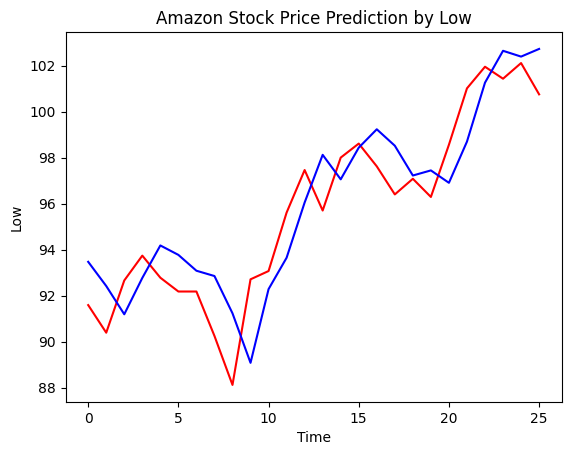

In [ ]:
plt.plot(real_stock_price_low,color='red',label='Real Amazon Stock Price by Low')
plt.plot(predicted_stock_price_low,color='blue',label='Predicted Amazon Stock Price by Low')
plt.title('Amazon Stock Price Prediction by Low')
plt.xlabel('Time')
plt.ylabel('Low')
plt.legend
plt.show()

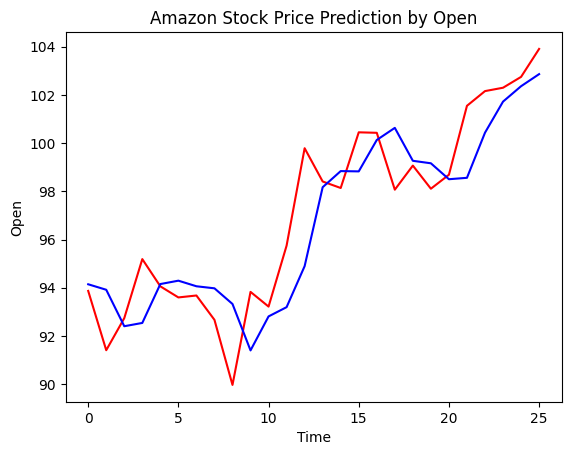

In [ ]:
plt.plot(real_stock_price_open,color='red',label='Real Amazon Stock Price')
plt.plot(predicted_stock_price_open,color='blue',label='Predicted Amazon Stock Price using LSTM')
plt.title('Amazon Stock Price Prediction by Open')
plt.xlabel('Time')
plt.ylabel('Open')
plt.legend
plt.show()

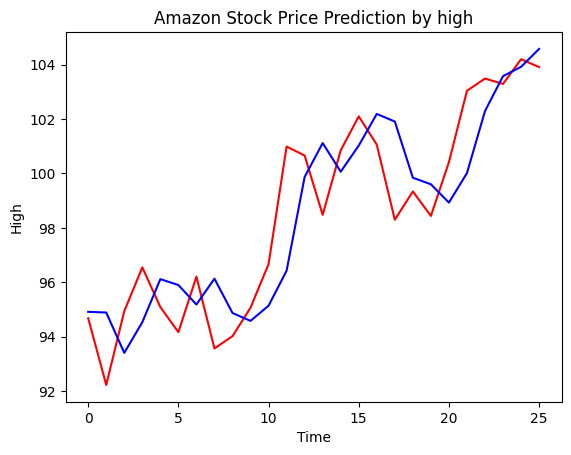

In [ ]:
plt.plot(real_stock_price_high,color='red',label='Real Amazon Stock Price')
plt.plot(predicted_stock_price_high,color='blue',label='Predicted Amazon Stock Price')
plt.title('Amazon Stock Price Prediction by high')
plt.xlabel('Time')
plt.ylabel('High')
plt.legend
plt.show()

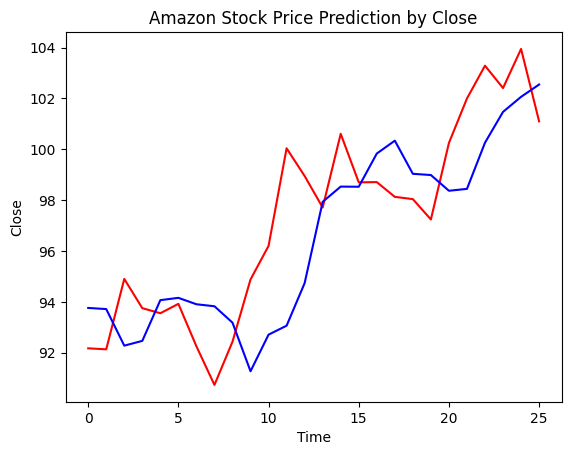

In [ ]:
plt.plot(real_stock_price_close,color='red',label='Real Amazon Stock Price')
plt.plot(predicted_stock_price_close,color='blue',label='Predicted Amazon Stock Price')
plt.title('Amazon Stock Price Prediction by Close')
plt.xlabel('Time')
plt.ylabel('Close')
plt.legend
plt.show()